# Visualizing Platemaps

**Predicting Cell Health**

**Gregory Way, 2019**

There are currently 9 different cell painting plates measured in this experiment.
This notebook will visualize platemaps and visually inspect for any plate induced artifacts.

In [1]:
suppressPackageStartupMessages(library(platetools))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(grid))

In [2]:
# Specify col_types
cols <- readr::cols(
  .default = readr::col_character(),
  correlation = readr::col_double()
)

# Specify the columns we're interested in plotting
plate_data_columns <- c("Metadata_gene_name",
                        "Metadata_pert_name",
                        "correlation")

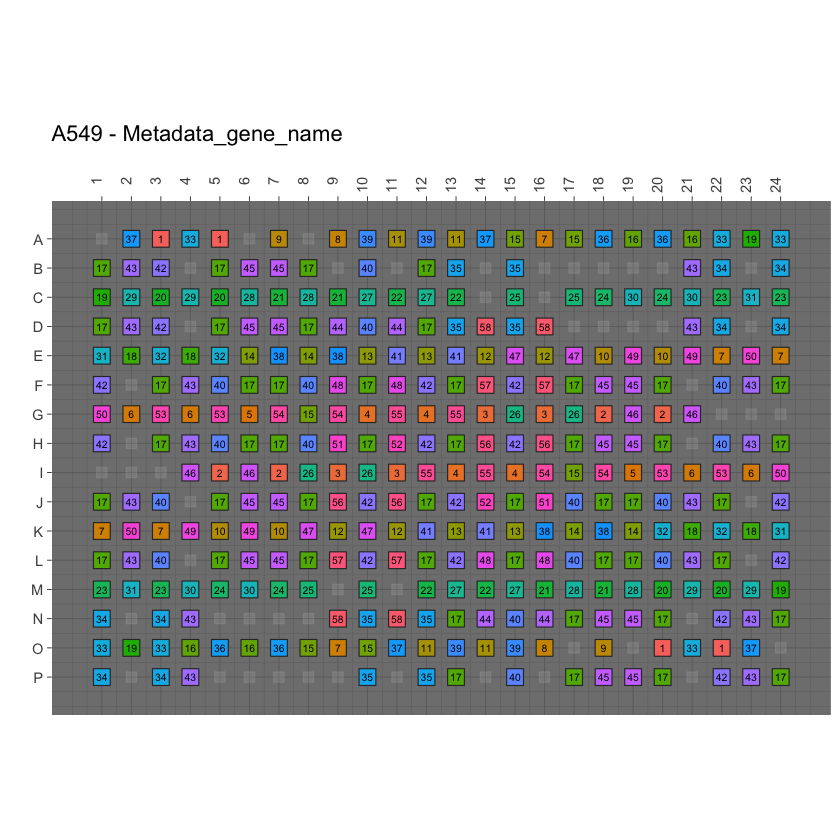

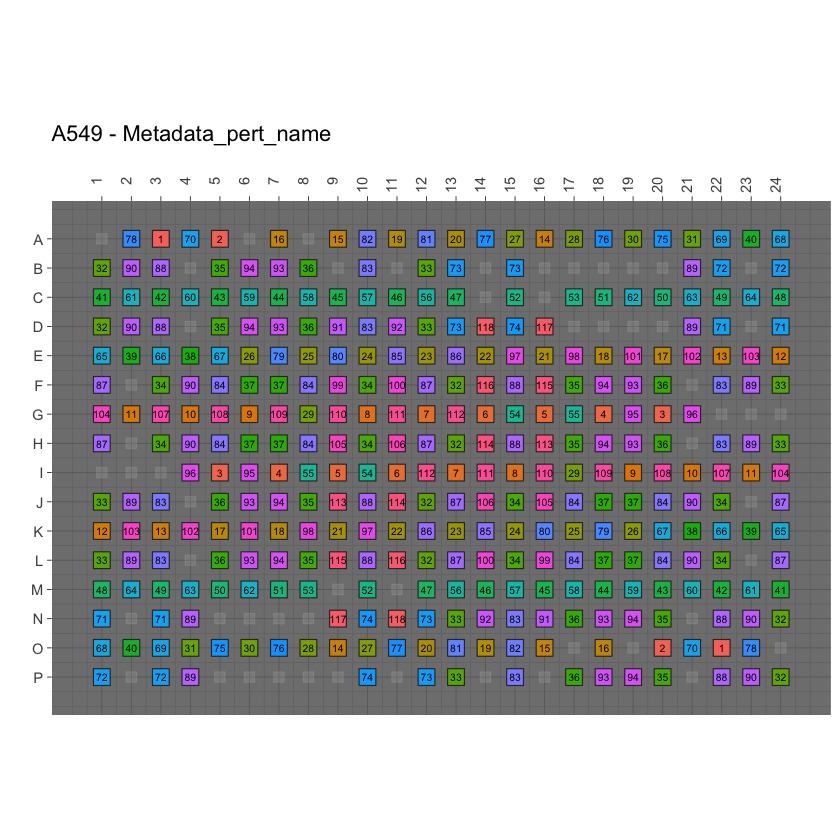

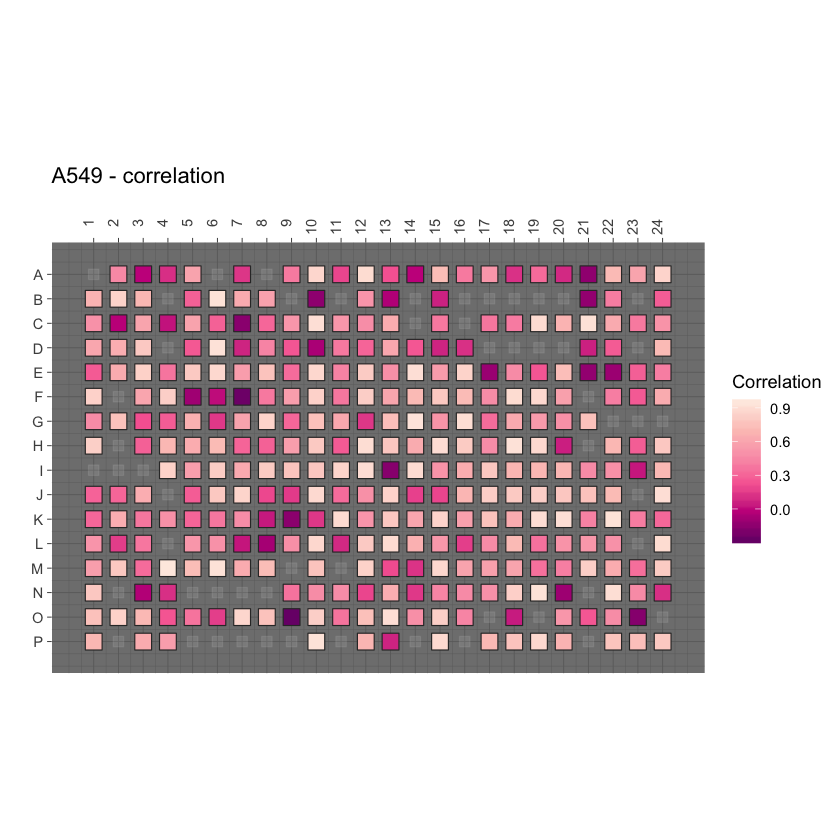

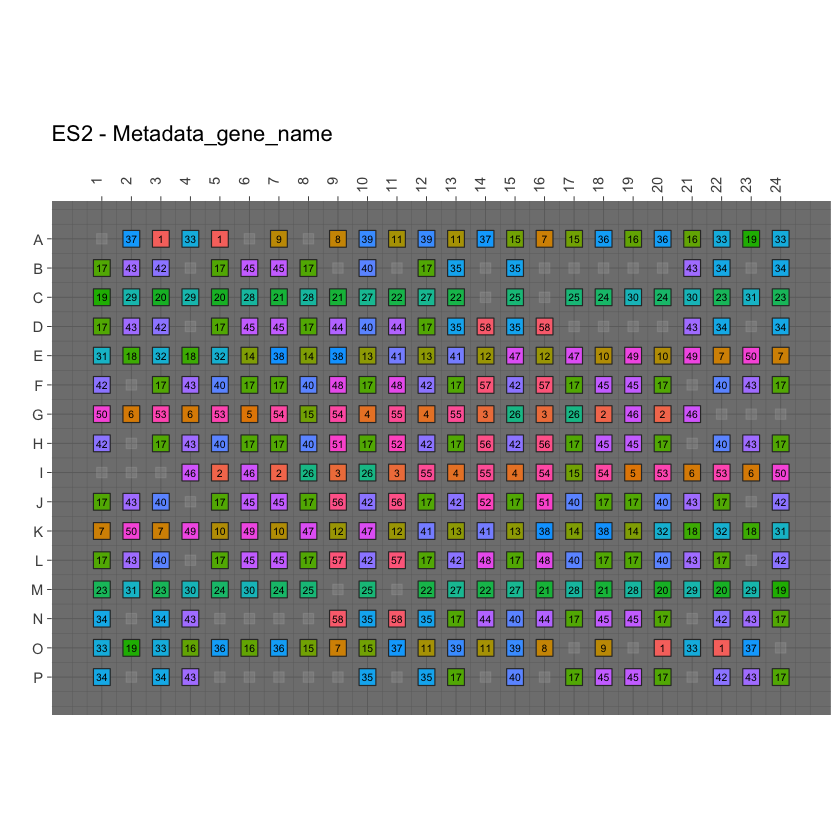

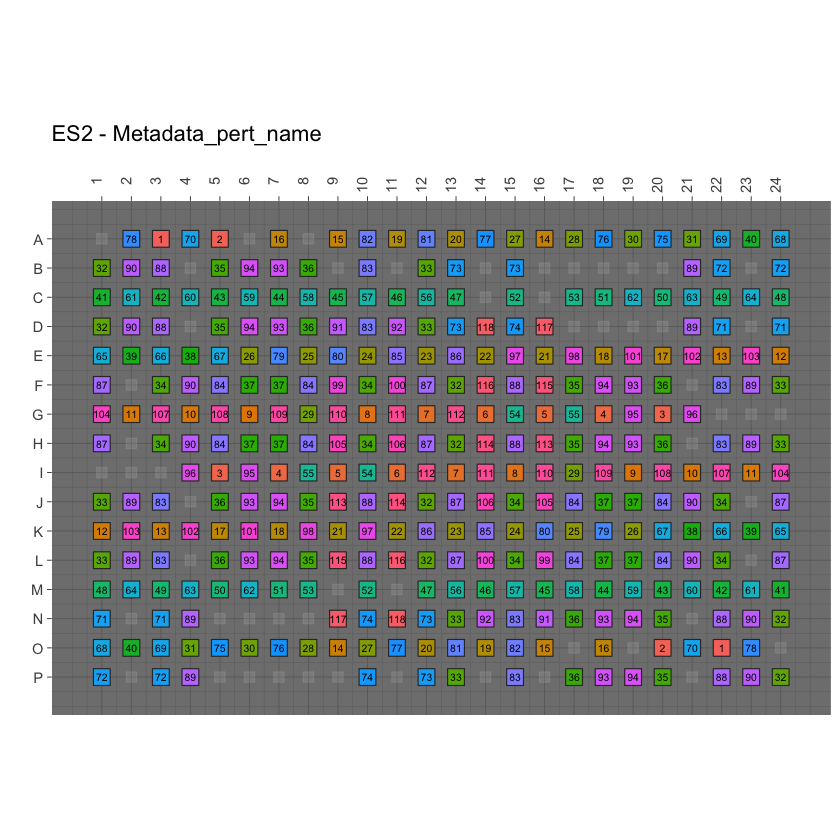

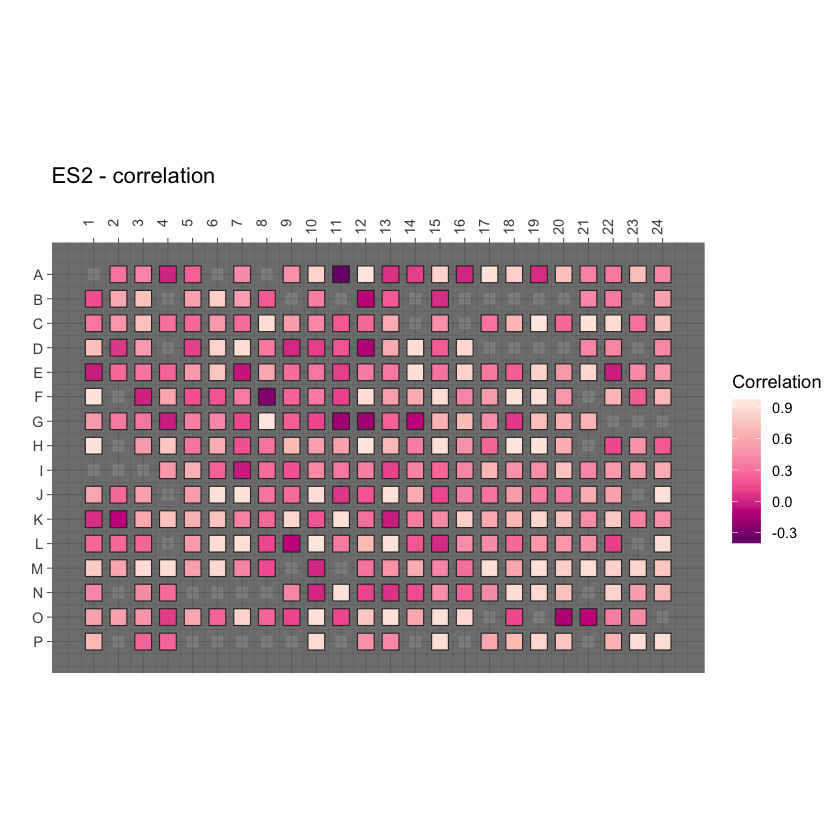

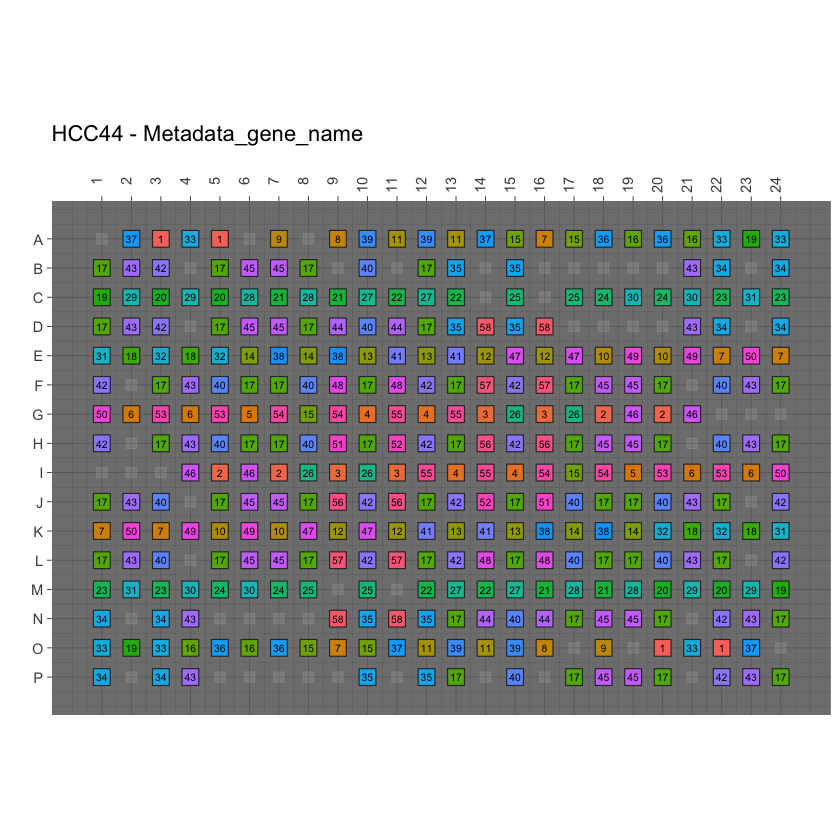

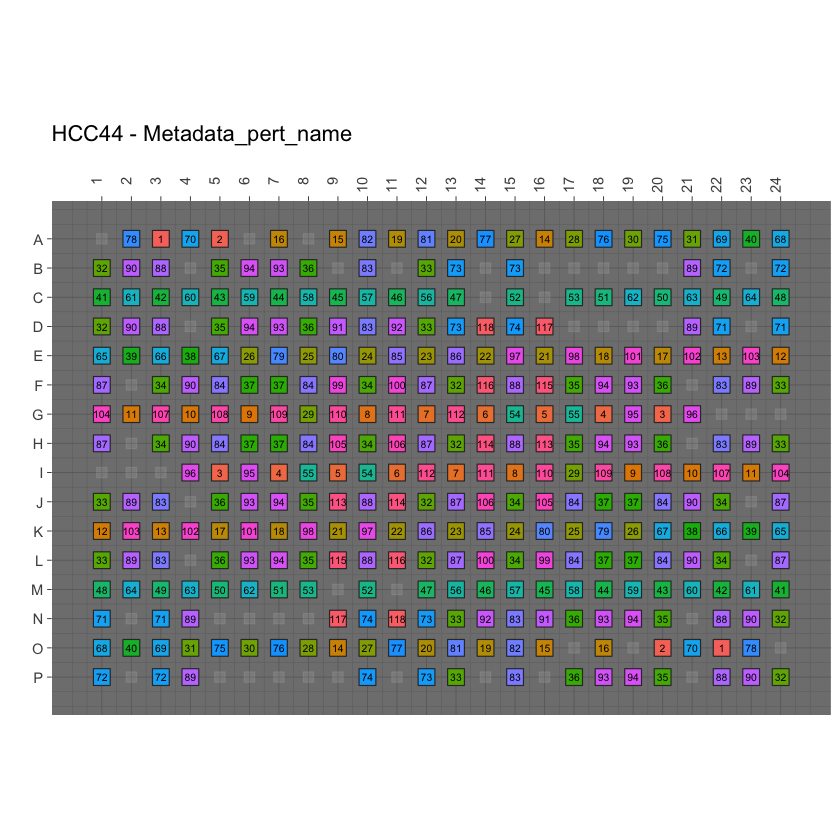

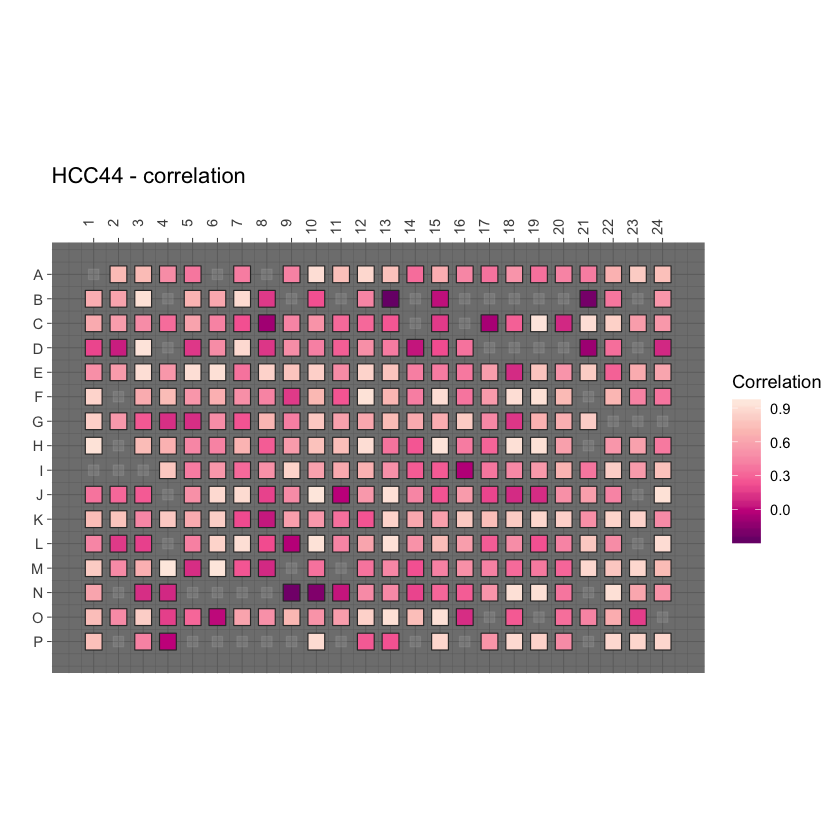

In [3]:
# Load and visualize platemaps
platemap_dir <- "data"
for (plate_file in list.files(platemap_dir, pattern = "_detailed.csv")) {
    full_plate_file <- file.path(platemap_dir, plate_file)
    cell_line <- strsplit(plate_file, "_")[[1]][2]
    platemap_df <- readr::read_csv(full_plate_file,
                                   col_types = cols) %>%
        dplyr::mutate(gene_id = group_indices(.,
                                              Metadata_gene_name)) %>%
        dplyr::mutate(pert_id = group_indices(.,
                                              Metadata_pert_name))

    plate_plot_list <- list()
    for (plate_data_id in plate_data_columns) {
        p <- platetools::raw_map(data = platemap_df[, plate_data_id],
                                 well = platemap_df$Metadata_Well,
                                 plate = 384) +
          ggtitle(paste(cell_line, "-", plate_data_id)) +
          theme_dark() +
          theme(axis.text.x = element_text(angle = 90,
                                           hjust = 1))

        if (plate_data_id == "correlation") {
          p <- p +
            scale_fill_distiller("Correlation",
                                 palette = "RdPu")
        } else if (plate_data_id == "Metadata_gene_name") {
          p <- p +
            geom_text(aes(label = platemap_df$gene_id),
                      size = 2.2) +
            theme(legend.position = "none")
        } else {
          p <- p +
            geom_text(aes(label = platemap_df$pert_id),
                      size = 2.2) +
            theme(legend.position = "none")
        }
        output_file <- file.path("figures",
                                 "platemaps",
                                 paste0("plate_map_", plate_data_id, "_", cell_line, ".png"))
        ggsave(output_file, height = 4, width = 5.5, dpi = 300)
                                 
        print(p)
    }
}